In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
import pandas as pd
from matplotlib import rc

from pprint import pprint

# Fig 3

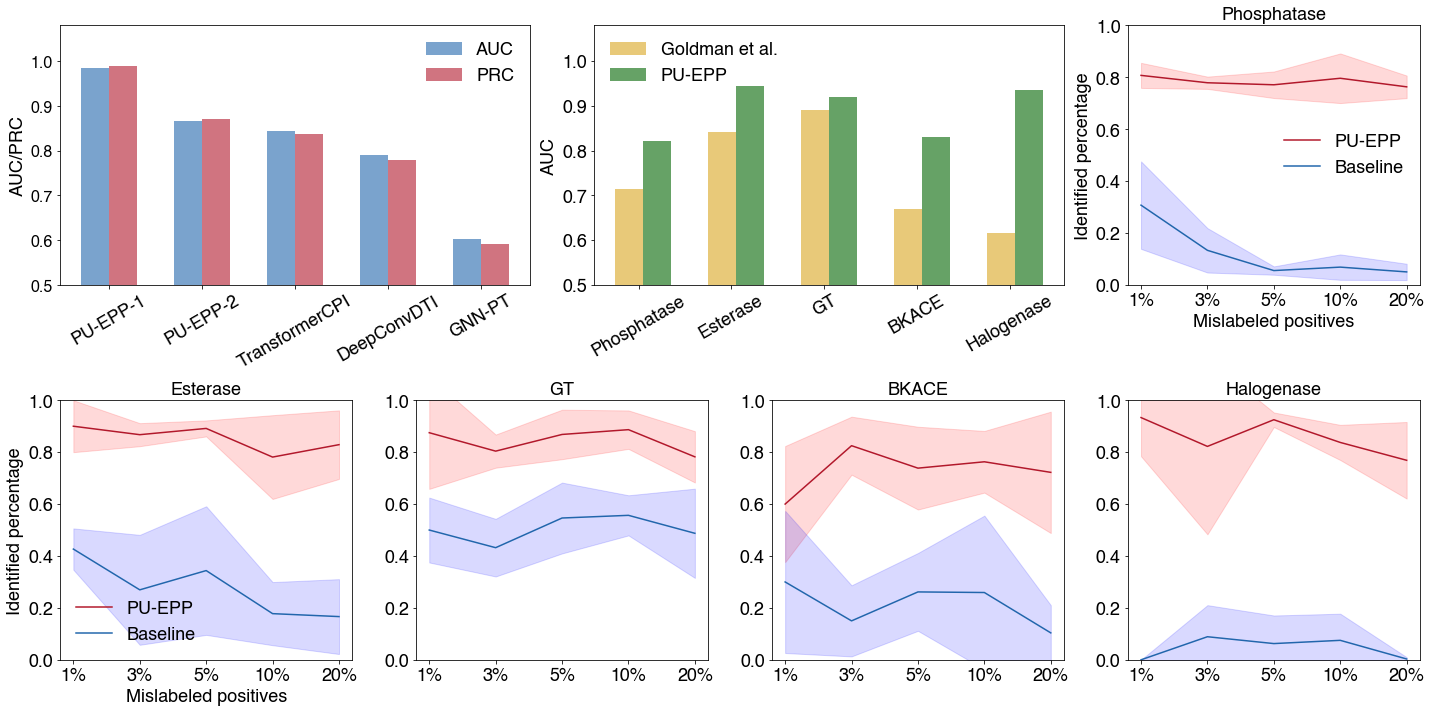

In [2]:
fig=plt.figure(figsize=(20,10))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

gs = fig.add_gridspec(2, 16)
bar_width=0.3
axxx = fig.add_subplot(gs[0:1, 0:6])

x = np.arange(0, 5) 
y1 = [0.9854, 0.8664, 0.8442, 0.7893, 0.6030]
y2 = [0.9883, 0.8702, 0.8375, 0.7799, 0.5909]

axxx.bar(x,y1,bar_width,
        color=['#2166ac','#2166ac','#2166ac','#2166ac','#2166ac'],
        label='AUC', alpha=0.6)

axxx.bar(x+bar_width,y2,bar_width,
        color=['#b2182b','#b2182b','#b2182b','#b2182b','#b2182b'],
        label='PRC', alpha=0.6)

tick_label = ["PU-EPP-1", 'PU-EPP-2','TransformerCPI', 'DeepConvDTI','GNN-PT']
plt.xticks(x+bar_width/2,tick_label, rotation=30, fontsize=18)
axxx.set_ylim(0.5,1.08)
plt.yticks(fontsize=16)
axxx.legend(frameon=False,loc ="upper right", fontsize=18)
plt.ylabel('AUC/PRC', fontsize=18)


axxxx = fig.add_subplot(gs[0:1, 6:12])
npres = open('./Data/aucmax_small_datasets.csv').readlines()
x = np.arange(0, 5)

dataname = ['phosphatase_chiral_binary_nopu',
            'esterase_binary_nopu', 'gt_acceptors_achiral_binary_nopu', 'duf_binary_nopu', 'halogenase_NaBr_binary_nopu']

mean_lst = []
std_lst = []
for d in dataname:
    lst = []
    for line in npres:
        if d in line:
            lst.append(float(line.split(',')[3]))
            
    mean_lst.append(np.mean(lst))
    std_lst.append(np.std(lst))
            
y1=mean_lst
y2 = [0.715, 0.841, 0.892,  0.67, 0.616,]

std_err1 = std_lst
std_err2 = std_lst

error_params1=dict(elinewidth=2,ecolor='black',capsize=4)
error_params2=dict(elinewidth=2,ecolor='black',capsize=4)

bar_width=0.3

axxxx.bar(x,y2,bar_width,
        color=['goldenrod','goldenrod','goldenrod','goldenrod','goldenrod'],
        label='Goldman et al.', alpha=0.6)  

axxxx.bar(x+bar_width,y1,bar_width,
        color=['darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'],
        label='PU-EPP', alpha=0.6)  


axxxx.legend(frameon=False,loc ="upper left", fontsize=18)
axxxx.set_ylim(0.5,1.08)
plt.yticks(fontsize=18)

tick_label = ['Phosphatase','Esterase', 'GT',  'BKACE', 'Halogenase']

plt.ylabel('AUC', fontsize=18)

plt.xticks(x+bar_width/3,tick_label, rotation=30, fontsize=18)


with open('./Data/flipres.json', 'r') as f:
    data = json.load(f)
    
ax3 = fig.add_subplot(gs[0:1, 12:16])

path = "phosphatase_chiral_binary"
pu = data[path + 'pu']
nopu = data[path+"nopu"]


pu_mean = [np.mean(i) for i in pu.values()]
nopu_mean = [np.mean(i) for i in nopu.values()]

pu_std = [np.std(i, ddof=1) for i in pu.values()]
nopu_std = [np.std(i, ddof=1) for i in nopu.values()]

pu_max = np.array(pu_mean) + np.array(pu_std)
pu_min = np.array(pu_mean) - np.array(pu_std)

nopu_max = np.array(nopu_mean) + np.array(nopu_std)
nopu_min = np.array(nopu_mean) - np.array(nopu_std)

ax3.plot(range(1,6),pu_mean, color='#b2182b', label="PU-EPP")
ax3.fill_between(range(1,6),pu_min,pu_max,color='r',alpha=0.15)

ax3.plot(range(1,6),nopu_mean,color='#2166ac', label="Baseline")
ax3.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.15)

ax3.set_title('Phosphatase', fontsize=18)
ax3.set_ylim(0,1.0)
plt.yticks(fontsize=18)

plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=18)
ax3.set_ylabel("Identified percentage", fontsize=18)
ax3.set_xlabel("Mislabeled positives", fontsize=18)
ax3.legend(frameon=False,loc ="best",fontsize=18)


path = "esterase_binary"
pu = data[path + 'pu']
nopu = data[path+"nopu"]


pu_mean = [np.mean(i) for i in pu.values()]
nopu_mean = [np.mean(i) for i in nopu.values()]

pu_std = [np.std(i, ddof=1) for i in pu.values()]
nopu_std = [np.std(i, ddof=1) for i in nopu.values()]

pu_max = np.array(pu_mean) + np.array(pu_std)
pu_min = np.array(pu_mean) - np.array(pu_std)

nopu_max = np.array(nopu_mean) + np.array(nopu_std)
nopu_min = np.array(nopu_mean) - np.array(nopu_std)



ax4 = fig.add_subplot(gs[1:2, 0:4])


ax4.plot(range(1,6),pu_mean, color='#b2182b', label="PU-EPP")
ax4.fill_between(range(1,6),pu_min,pu_max,color='r',alpha=0.15)
ax4.set_title('Esterase', fontsize=18)

ax4.plot(range(1,6),nopu_mean,color='#2166ac', label="Baseline")
ax4.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.15)

ax4.set_ylim(0,1.0)
ax4.legend(frameon=False,loc ="lower left", fontsize=18)
plt.yticks(fontsize=18)

plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=18)
ax4.set_ylabel("Identified percentage", fontsize=18)
ax4.set_xlabel("Mislabeled positives", fontsize=18)

ax2 = fig.add_subplot(gs[1:2, 4:8])

path = "gt_acceptors_achiral_binary"
pu = data[path + 'pu']
nopu = data[path+"nopu"]


pu_mean = [np.mean(i) for i in pu.values()]
nopu_mean = [np.mean(i) for i in nopu.values()]

pu_std = [np.std(i, ddof=1) for i in pu.values()]
nopu_std = [np.std(i, ddof=1) for i in nopu.values()]

pu_max = np.array(pu_mean) + np.array(pu_std)
pu_min = np.array(pu_mean) - np.array(pu_std)

nopu_max = np.array(nopu_mean) + np.array(nopu_std)
nopu_min = np.array(nopu_mean) - np.array(nopu_std)


ax2.plot(range(1,6),pu_mean,color='#b2182b', label="PU-EPP")
ax2.fill_between(range(1,6),pu_min,pu_max,color='r',alpha=0.15)

ax2.plot(range(1,6),nopu_mean, color='#2166ac', label="Baseline")
ax2.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.15)

ax2.set_ylim(0,1.0)
plt.yticks(fontsize=18)

ax2.set_title("GT", fontsize=18)
plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=18)


ax1 = fig.add_subplot(gs[1:2, 8:12])


path = "duf_binary"
pu = data[path + 'pu']
nopu = data[path+"nopu"]

pu_mean = [np.mean(i) for i in pu.values()]
nopu_mean = [np.mean(i) for i in nopu.values()]

pu_std = [np.std(i, ddof=1) for i in pu.values()]
nopu_std = [np.std(i, ddof=1) for i in nopu.values()]

pu_max = np.array(pu_mean) + np.array(pu_std)
pu_min = np.array(pu_mean) - np.array(pu_std)

nopu_max = np.array(nopu_mean) + np.array(nopu_std)
nopu_min = np.array(nopu_mean) - np.array(nopu_std)

ax1.plot(range(1,6),pu_mean,color='#b2182b', label="PU-EPP")
ax1.fill_between(range(1,6),pu_min,pu_max,color='r',alpha=0.15)

ax1.plot(range(1,6),nopu_mean, color='#2166ac', label="Baseline")
ax1.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.15)


ax1.set_title('BKACE', fontsize=18)
ax1.set_ylim(0,1.0)
plt.yticks(fontsize=18)

plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=18)


ax5 = fig.add_subplot(gs[1:2, 12:16])

path = "halogenase_NaBr_binary"
pu = data[path + 'pu']
nopu = data[path+"nopu"]

pu_mean = [np.mean(i) for i in pu.values()]
nopu_mean = [np.mean(i) for i in nopu.values()]

pu_std = [np.std(i, ddof=1) for i in pu.values()]
nopu_std = [np.std(i, ddof=1) for i in nopu.values()]

pu_max = np.array(pu_mean) + np.array(pu_std)
pu_min = np.array(pu_mean) - np.array(pu_std)

nopu_max = np.array(nopu_mean) + np.array(nopu_std)
nopu_min = np.array(nopu_mean) - np.array(nopu_std)

ax5.plot(range(1,6),pu_mean, color='#b2182b', linewidth=1.5, label="PU-EPP")
ax5.fill_between(range(1,6),pu_min,pu_max,color='r',alpha=0.15)

ax5.plot(range(1,6),nopu_mean, color='#2166ac', linewidth=1.5, label="Baseline")
ax5.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.15)

ax5.set_title('Halogenase', fontsize=18)
ax5.set_ylim(0,1.0)
plt.yticks(fontsize=18)

plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=18)

plt.tight_layout()

plt.savefig('./Fig 3.png', dpi=400, bbox_inches = 'tight')



# Fig S5

In [3]:
df = pd.read_csv('./Data/aucmax_pu.csv')
df_no = pd.read_csv('./Data/aucmax_nopu.csv')
df.head()

,Epoch,Time(sec),Loss_train,AUC_dev,pre,recall,PRC_dev,flipnum,data
0,55,18.112074,2.557255,0.899068,0.399478,0.944444,0.651151,8,gt_acceptors_achiral_binary_nopu
1,48,17.344632,2.648537,0.899864,0.505882,0.796296,0.667676,25,gt_acceptors_achiral_binary_nopu
2,58,16.979568,2.065133,0.900501,0.440000,0.882716,0.663501,41,gt_acceptors_achiral_binary_nopu
3,55,16.541357,2.097119,0.895752,0.434132,0.895062,0.649351,83,gt_acceptors_achiral_binary_nopu
4,56,15.616649,2.246661,0.889145,0.505660,0.827160,0.633545,167,gt_acceptors_achiral_binary_nopu


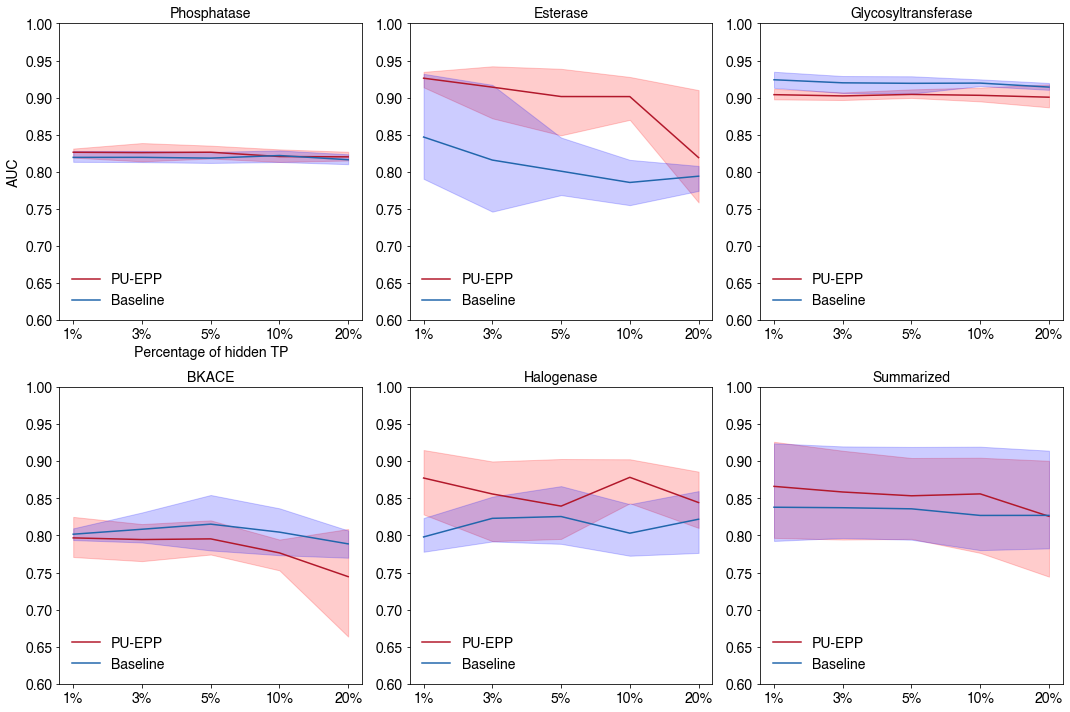

In [4]:
fig=plt.figure(figsize=(15,10))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42


paths = ['phosphatase_chiral_binary_nopu', 'esterase_binary_nopu', 'gt_acceptors_achiral_binary_nopu', 
         'duf_binary_nopu', 'halogenase_NaBr_binary_nopu']

tick_label = ['Glycosyltransferase', 'Phosphatase','Esterase', 'BKACE', 'Halogenase']

database_dct = {
    'gt_acceptors_achiral_binary_nopu': 'Glycosyltransferase',
    'phosphatase_chiral_binary_nopu': 'Phosphatase',
    'esterase_binary_nopu': 'Esterase',
    'duf_binary_nopu': 'BKACE',
    'halogenase_NaBr_binary_nopu': 'Halogenase',
}


all_pu_lst = []
all_nopu_lst = []

for index, path in enumerate(paths):
    num_lst = df.loc[(df["data"] == path)]['flipnum'].to_list()
    
    pu_lst = []
    non_pulst = []
    for num in num_lst[:5]:
        pu = df.loc[(df["data"] == path) & (df["flipnum"] == num)]["AUC_dev"].to_list()
        nopu = df_no.loc[(df["data"] == path) & (df["flipnum"] == num)]["AUC_dev"].to_list()
        pu_lst.append(pu)
        non_pulst.append(nopu)
        
    pu_mean = [np.mean(i) for i in pu_lst]
    all_pu_lst.append(pu_mean)
    
    nopu_mean = [np.mean(i) for i in non_pulst]
    all_nopu_lst.append(nopu_mean)
    
    pu_max = [max(np.max(i), np.mean(i) + (1.96 * stats.sem(i))) for i in pu_lst]
    pu_min = [min(np.min(i), np.mean(i) - (1.96 * stats.sem(i))) for i in pu_lst]
    
    nopu_max = [max(np.max(i), np.mean(i) + (1.96 * stats.sem(i))) for i in non_pulst]
    nopu_min = [min(np.min(i), np.mean(i) - (1.96 * stats.sem(i))) for i in non_pulst]
    
    ax=fig.add_subplot(int("23{}".format(index+1)))
    ax.set_title(database_dct[path], fontsize=14)
    ax.set_ylim(0.6,1.0)
    
    ax.plot(range(1,6),pu_mean, color='#b2182b', label='PU-EPP') # ,marker='^'
    ax.fill_between(range(1,6),pu_min,pu_max,color='r', alpha=0.2, )
    
    ax.plot(range(1,6),nopu_mean, color='#2166ac', label='Baseline')
    ax.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.2)
    ax.legend(frameon=False,loc ="lower left", fontsize=14)
    
    if index == 0:
        ax.set_ylabel("AUC", fontsize=14)
        ax.set_xlabel("Percentage of hidden TP", fontsize=14)

    plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=14)
    plt.yticks(fontsize=14)


lst = []
lst1 = []
lst2 = []
lst3 = []
lst4 = []
for i in all_pu_lst:
    lst.append(i[0])
    lst1.append(i[1])
    lst2.append(i[2])
    lst3.append(i[3])
    lst4.append(i[4])
    
all_pu_lst = [np.mean(lst), np.mean(lst1), np.mean(lst2), np.mean(lst3), np.mean(lst4), ]


pu_max = [max(np.max(i), np.mean(i) + (1.96 * stats.sem(i))) for i in [lst, lst1, lst2, lst3, lst4]]
pu_min = [min(np.min(i), np.mean(i) - (1.96 * stats.sem(i))) for i in [lst, lst1, lst2, lst3, lst4]]

lst = []
lst1 = []
lst2 = []
lst3 = []
lst4 = []
for i in all_nopu_lst:
    lst.append(i[0])
    lst1.append(i[1])
    lst2.append(i[2])
    lst3.append(i[3])
    lst4.append(i[4])


all_nopu_lst = [np.mean(lst), np.mean(lst1), np.mean(lst2), np.mean(lst3), np.mean(lst4), ]

nopu_max = [max(np.max(i), np.mean(i) + (1.96 * stats.sem(i))) for i in [lst, lst1, lst2, lst3, lst4]]
nopu_min = [min(np.min(i), np.mean(i) - (1.96 * stats.sem(i))) for i in [lst, lst1, lst2, lst3, lst4]]


ax=fig.add_subplot(int("236"))
ax.set_title('Summarized', fontsize=14)
ax.set_ylim(0.6,1.0)

ax.plot(range(1,6),all_pu_lst, color='#b2182b', label='PU-EPP') 
ax.fill_between(range(1,6),pu_min,pu_max,color='r', alpha=0.2, )

ax.plot(range(1,6),all_nopu_lst, color='#2166ac', label='Baseline')
ax.fill_between(range(1,6),nopu_min,nopu_max,color='b',alpha=0.2)
ax.legend(frameon=False,loc ="lower left", fontsize=14)

plt.xticks(range(1,6), ("1%", "3%", "5%", '10%', "20%"), fontsize=14)
plt.yticks(fontsize=14)
    
plt.tight_layout()

plt.savefig('./Fig S5.png', dpi=400, bbox_inches = 'tight')